#                        House Sales and Rental data in NSW

## Portfolio 4


> Mihir Arya - 46785264

## Datasets:

Rent and Sales data - [NSW Department of Family and Community Service](https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/dashboard)

Income Data - [Australian Bureau of Statistics Census](https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/personal-income-australia/latest-release#data-download)


## Introduction:
The property market in the region of NSW has seen a drastic increase in the prices due to higher demands.
This has resulted into a property crisis which will worsen in the coming future. The surge in the prices each year amounts to about 10%.
The reasons behind such prices increases are:
- Immigration of new people for education
- Lower supply of houses in comparision to the demand
- People coming to the country for work or business.
- Foreign investors

As the issue has escalated Immensely, I would like to present a relationship between the sale of houses in NSW with factors like the income, number of people earning and the prices of the houses.For this analysis we have considered various LGA's in NSW.

## Objectives of analysis:
- Predicting the number of house sales for all LGA's based on the income data.  
- Clustering LGAs based on Rent, Sales, and Income data.
- Performing linear regression
- Using Train Test and R^2 model to find goodness of fit.
- Performing the K means regression model.
- Classification model based on rent, sales,and income data.
- To find the mean rental cost per LGA.   
- To find the mean sales prices for all LGAs.  

## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing, Cleaning, Exploration and data Visulatization:

In [4]:
rental = pd.read_csv('rental_data.csv')
house_sales = pd.read_csv('house_sales_data.csv')
inc = pd.read_csv("income_data.csv")

### Rental Data

In [5]:
rental.head(10)

,Greater Metropolitan Region (GMR),Greater Sydney,Rings,Local Government Area (LGA),Dwelling Types,Number of Bedrooms,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,380,475,600,"78,448","8,20,712",1.06%,3.26%,-8.42%,-1.68%
1,Total,Total,Total,Total,Total,Bedsitter,280,330,400,"1,262","10,433",1.54%,-5.71%,-18.89%,12.68%
2,Total,Total,Total,Total,Total,1 Bedroom,320,415,495,"14,934","1,21,447",1.22%,-1.19%,-14.09%,3.53%
3,Total,Total,Total,Total,Total,Not Specified,300,400,510,"1,442","41,363",0.00%,-2.44%,3.30%,-21.03%
4,Total,Total,Total,Total,Total,2 Bedrooms,370,450,590,"31,498","3,08,268",-2.17%,-2.17%,-9.31%,3.10%
5,Total,Total,Total,Total,Total,3 Bedrooms,420,500,650,"19,355","2,27,704",0.00%,11.11%,-4.49%,-7.17%
6,Total,Total,Total,Total,Total,4 or more Bedrooms,520,620,800,"9,957","1,11,497",1.64%,10.71%,-3.56%,-9.60%
7,Total,Total,Total,Total,House,Total,400,500,650,"26,633","3,00,963",0.00%,11.11%,-2.04%,-9.14%
8,Total,Total,Total,Total,House,Bedsitter,310,410,530,102,843,9.33%,6.49%,0.99%,-12.82%
9,Total,Total,Total,Total,House,1 Bedroom,241,318,420,"1,034","6,883",5.83%,3.25%,-6.59%,9.77%


In [6]:
rental.shape

(33115, 15)

In [7]:
rental = rental.drop(['Quarterly change in Median Weekly Rent','Annual change in Median Weekly Rent','Quarterly change in New Bonds Lodged','Annual change in New Bonds Lodged'], axis = 1)

In [8]:
rental.shape

(33115, 11)

In [9]:
## Filtering data to only get LGA
f1= rental['Greater Metropolitan Region (GMR)'] == "Total"
f2= rental['Rings'] == "Total"
f3= rental['Greater Sydney'] == "Total"
af= f1&f2&f3
rental = rental[af]
rental = rental.drop(['Rings', 'Greater Metropolitan Region (GMR)', 'Greater Sydney'], axis=1)
rental = rental.iloc[1:]
rental = rental.reset_index()
rental = rental.drop(['index'], axis=1)


## Renaming columns
rental.rename(columns={"First Quartile Weekly Rent for New Bonds\n$": "First_Quartile_Weekly_Rent",
                      "Median Weekly Rent for New Bonds\n$": "Median_Weekly_Rent",
                     "Third Quartile Weekly Rent for New Bonds\n$": "Third Quartile_Weekly_Rent",
                     "New Bonds Lodged\nNo.": "New_Bonds_Lodged",
                     "Total Bonds Held\nNo.": "Total_Bonds","Local Government Area (LGA)":"LGA"}, inplace=True)

#Replacing s and 


rental = rental.replace(to_replace =["-"],value = "0")
rental = rental.replace(to_replace =["s"],value = "20")

In [10]:
rental.head()

,LGA,Dwelling Types,Number of Bedrooms,First_Quartile_Weekly_Rent,Median_Weekly_Rent,Third Quartile_Weekly_Rent,New_Bonds_Lodged,Total_Bonds
0,Total,Total,Bedsitter,280,330,400,"1,262","10,433"
1,Total,Total,1 Bedroom,320,415,495,"14,934","1,21,447"
2,Total,Total,Not Specified,300,400,510,"1,442","41,363"
3,Total,Total,2 Bedrooms,370,450,590,"31,498","3,08,268"
4,Total,Total,3 Bedrooms,420,500,650,"19,355","2,27,704"


In [11]:
rental.shape

(4029, 8)

In [12]:
rental['Median_Weekly_Rent'] = rental['Median_Weekly_Rent'].replace('[^\d.]','', regex=True).astype(float)
rental['Dwelling Types'] = rental['Dwelling Types'].astype('str')
rental['LGA'] = rental['LGA'].astype('str')

In [13]:
mean = rental['Median_Weekly_Rent'].mean()
mean

186.271034996277

In [14]:
group1 = rental.groupby('LGA').agg({'Median_Weekly_Rent':'mean'})
group1 = group1.reset_index()
group1

,LGA,Median_Weekly_Rent
0,Albury,150.558824
1,Armidale Regional,142.029412
2,Ballina,268.470588
3,Balranald,0.000000
4,Bathurst Regional,144.647059
...,...,...
124,Wingecarribee,192.823529
125,Wollondilly,146.090909
126,Wollongong,281.885714
127,Woollahra,496.029412


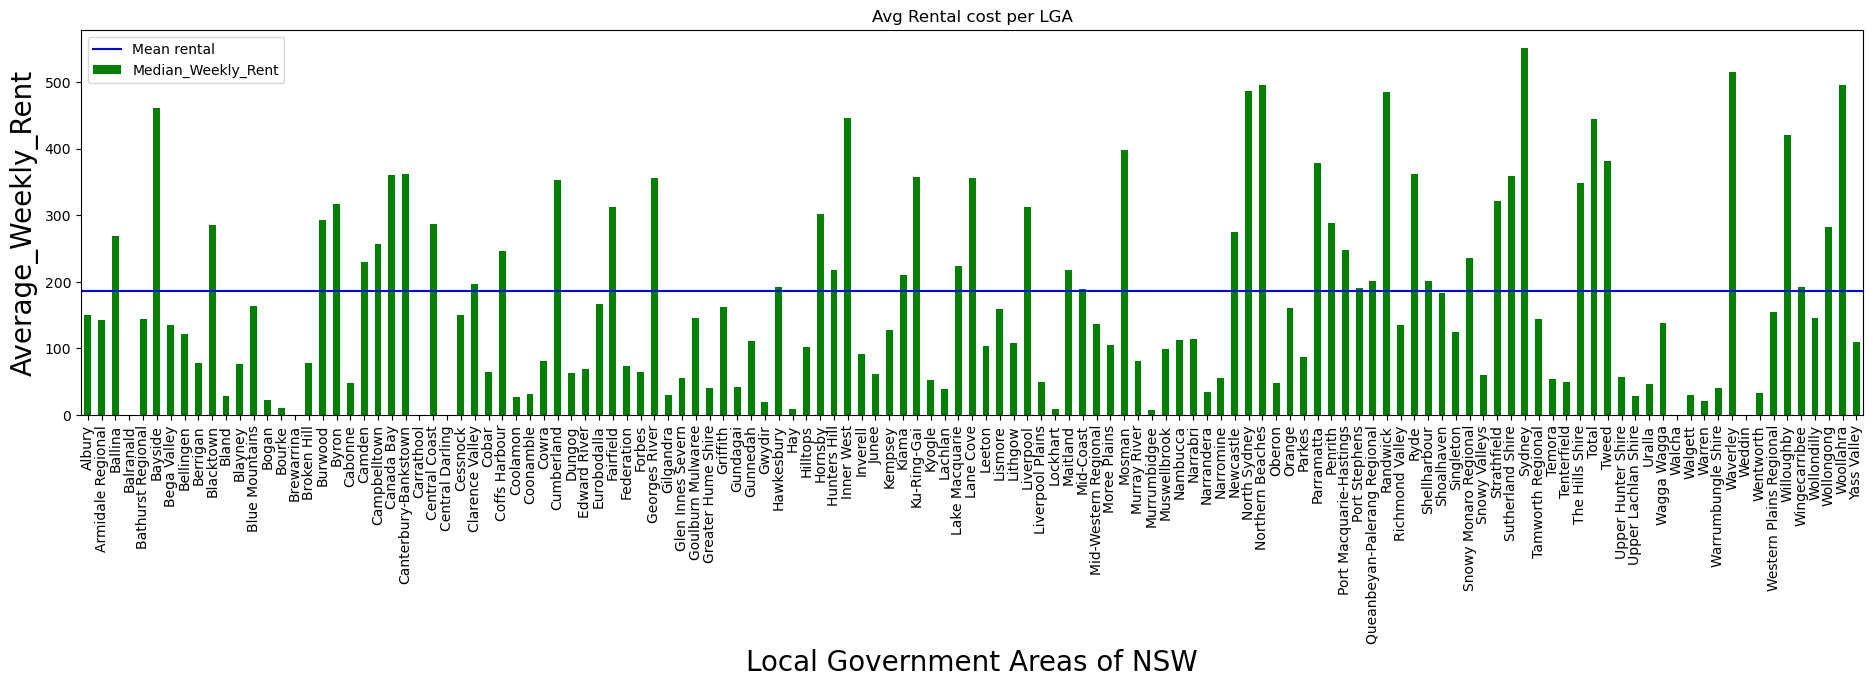

In [34]:
group1.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Median_Weekly_Rent', facecolor='g') # rotate the bars by 90 degrees

plt.axhline(mean, color='b', linestyle='-', label='Mean rental') ## find the mean price amongst all the LGA's

plt.xlabel('Local Government Areas of NSW', size=20)
plt.ylabel('Average_Weekly_Rent', size=20)
plt.title('Avg Rental cost per LGA')
plt.legend()
plt.show()

The above bar graph, represents the average rent for all LGA's. The blue line represents the average rental mean, which represents the average of all LGA's which is $186. And the highest rental cost is in Sydney followed by waverlly.

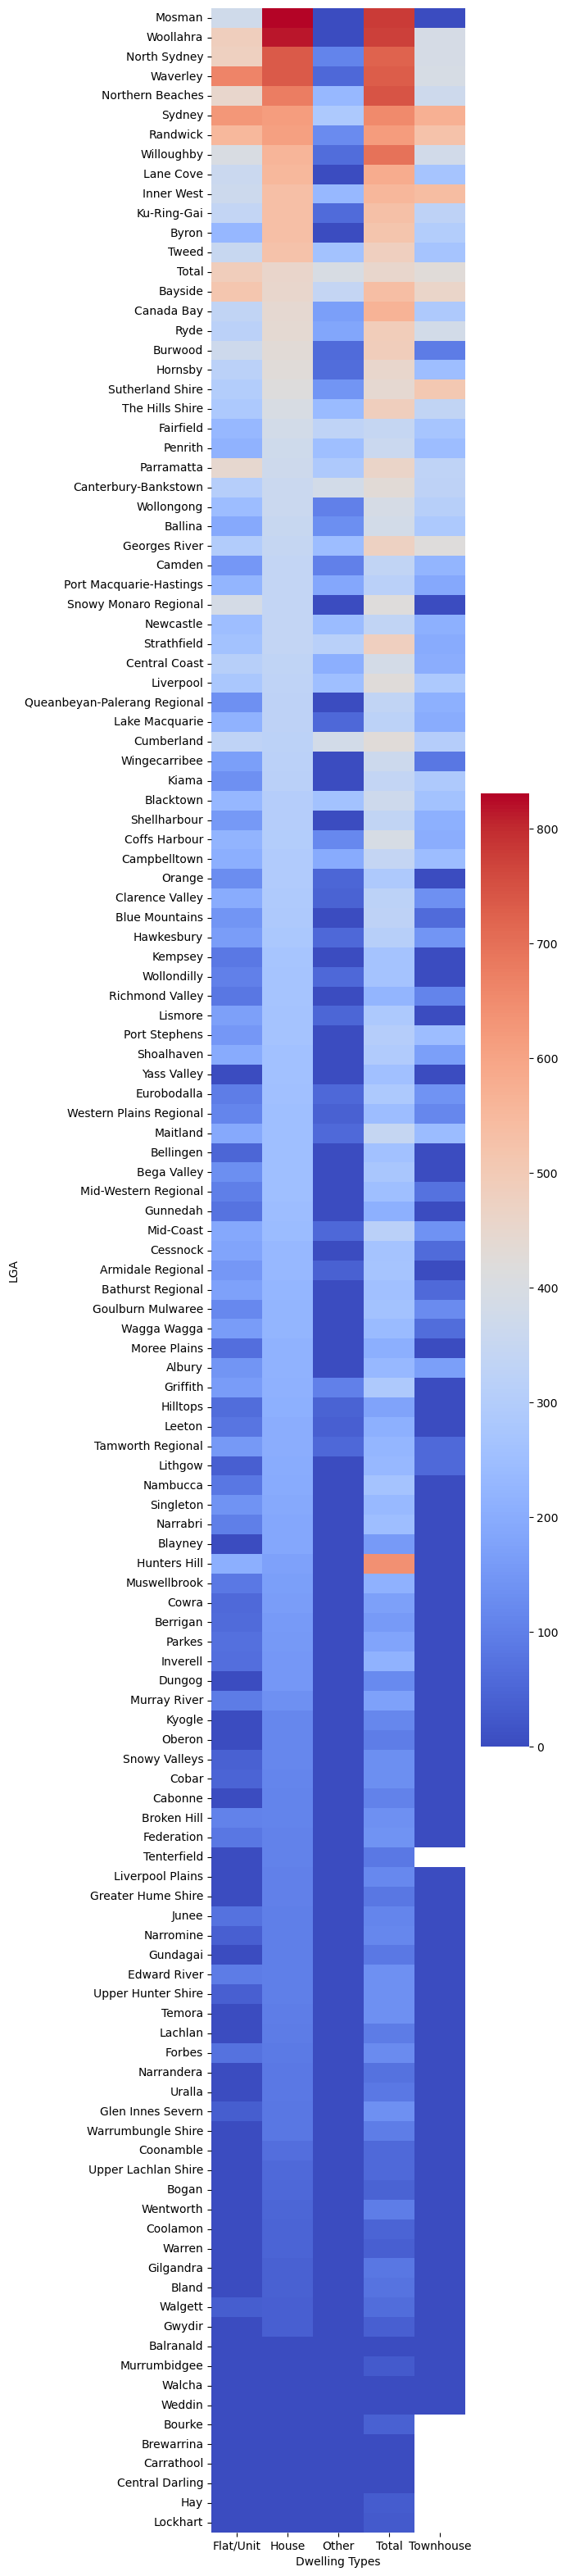

In [17]:
heatmap = pd.pivot_table(rental,values='Median_Weekly_Rent', index=['LGA'], columns='Dwelling Types')
heatmap_plot=heatmap.sort_values(["House", "Flat/Unit", "Other", "Townhouse"], ascending = (False, False,False,False))
plt.figure(figsize=(5,40))
sns.heatmap(heatmap_plot, cmap="coolwarm")
plt.show()

The above heatmap, represents distribution among all LGA's in New South Wales.

### Sales Data

In [18]:
house_sales.head()

,Greater Metropolitan Region (GMR),Greater Sydney,Rings,Local Government Area (LGA),DwellingType,First Quartile Sales Price\n$'000s,Median Sales Price\n$'000s,Third Quartile Sales Price\n'000s,Mean Sales Price\n$'000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,Total,Total,Total,Total,Total,540,740,1074,955,"37,195",2.07%,8.07%,-10.52%,37.79%
1,Total,Total,Total,Total,Non Strata,540,770,1200,1014,"24,156",2.67%,12.41%,-14.27%,38.78%
2,Total,Total,Total,Total,Strata,540,695,912,846,"13,039",1.02%,2.21%,-2.64%,35.99%
3,Total,Total,Total,Albury,Total,299,380,500,403,361,2.56%,19.12%,-10.64%,34.70%
4,Total,Total,Total,Albury,Non Strata,340,413,530,443,285,-0.12%,19.02%,-14.67%,31.34%


In [20]:
## Renaming columns
house_sales.rename(columns={"First Quartile Sales Price\n$'000s": "First_Quartile_Sales_Price",
                      "Median Sales Price\n$'000s": "Median_Sales_Price",
                     "Third Quartile Sales Price\n'000s": "Third_Quartile_Sales_Price",
                     "Mean Sales Price\n$'000s": "Mean_Sales_Price",
                     "Sales\nNo.": "Number_of_Sales", "Local Government Area (LGA)":"LGA"}, inplace=True)

## Dropping quarterly and annual change data
sales_d1 = house_sales.drop(['Qtly change in Median','Annual change in Median','Qtly change in Count','Annual change in Count'], axis=1)


## Filtering data to only get LGA wise data
f4= sales_d1['Greater Metropolitan Region (GMR)'] == "Total"
f5= sales_d1['Rings'] == "Total"
f6= sales_d1['Greater Sydney'] == "Total"
af= f4&f5&f6
sales_d2 = sales_d1[af]

## dropping and resetting index for the columns
sales_d2 = sales_d2.drop(['Rings', 'Greater Metropolitan Region (GMR)', 'Greater Sydney'], axis=1)
sales_d2 = sales_d2.iloc[1:]
sales_d2 = sales_d2.reset_index()
sales_d2 = sales_d2.drop(['index'], axis=1)



#Replacing s with 15 and - with 0 
sales_d2 = sales_d2.replace(to_replace =["s"],value = "20")
sales_d2 = sales_d2.replace(to_replace =["-"],value = "0")

## selecting the row only with the LGA, i.e ignoring the top 3 'Total' in LGA and resetting index
sales_d2= sales_d2.iloc[2:]
sales_d2= sales_d2.reset_index()
sales_d2 = sales_d2.drop(['index'], axis=1)
sales_d2


,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales
0,Albury,Total,299,380,500,403,361
1,Albury,Non Strata,340,413,530,443,285
2,Albury,Strata,178,221,299,251,76
3,Armidale Regional,Total,296,355,455,403,179
4,Armidale Regional,Non Strata,310,372,459,408,154
...,...,...,...,...,...,...,...
337,Woollahra,Total,1350,2195,4175,2951,306
338,Woollahra,Non Strata,2990,4287,5828,4594,107
339,Woollahra,Strata,1150,1640,2490,2067,199
340,Yass Valley,Total,526,750,996,775,72


In [21]:
#Converting from object to numeric
sales_d2.dtypes

LGA                           object
DwellingType                  object
First_Quartile_Sales_Price    object
Median_Sales_Price            object
Third_Quartile_Sales_Price    object
Mean_Sales_Price              object
Number_of_Sales               object
dtype: object

In [22]:
sales_d2["First_Quartile_Sales_Price"] = pd.to_numeric(sales_d2["First_Quartile_Sales_Price"])
sales_d2["Median_Sales_Price"] = pd.to_numeric(sales_d2["Median_Sales_Price"])
sales_d2["Third_Quartile_Sales_Price"] = pd.to_numeric(sales_d2["Third_Quartile_Sales_Price"])
sales_d2["Mean_Sales_Price"] = pd.to_numeric(sales_d2["Mean_Sales_Price"])
sales_d2["Number_of_Sales"] = sales_d2["Number_of_Sales"].str.replace(',', '').astype(int)
sales_d2["Number_of_Sales"] = pd.to_numeric(sales_d2["Number_of_Sales"])
sales_d2.dtypes

LGA                           object
DwellingType                  object
First_Quartile_Sales_Price     int64
Median_Sales_Price             int64
Third_Quartile_Sales_Price     int64
Mean_Sales_Price               int64
Number_of_Sales                int64
dtype: object

In [24]:
sales_d2.shape

(342, 7)

In [25]:
groupsales = sales_d2[sales_d2["DwellingType"] == "Total"]
grpsales = groupsales.groupby('LGA')['Number_of_Sales'].sum()
grpsales = groupsales.reset_index()
grpsales

,index,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales
0,0,Albury,Total,299,380,500,403,361
1,3,Armidale Regional,Total,296,355,455,403,179
2,6,Ballina,Total,635,795,1143,927,218
3,9,Balranald,Total,0,0,0,0,0
4,11,Bathurst Regional,Total,371,460,550,472,262
...,...,...,...,...,...,...,...,...
123,328,Wingecarribee,Total,702,900,1280,1035,386
124,331,Wollondilly,Total,661,813,1129,900,202
125,334,Wollongong,Total,577,720,922,793,900
126,337,Woollahra,Total,1350,2195,4175,2951,306


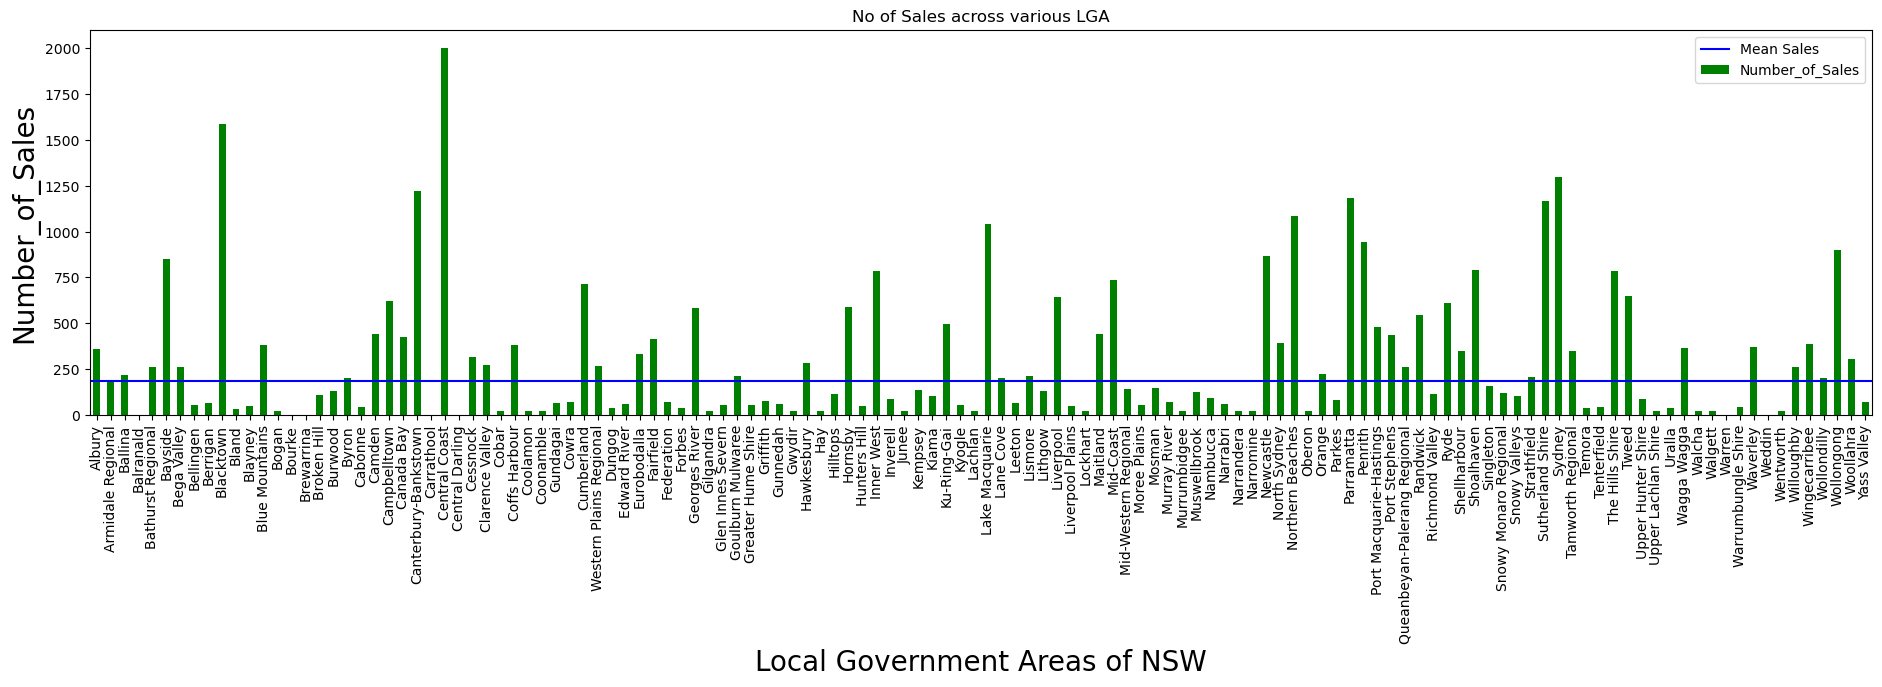

In [33]:
grpsales.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Number_of_Sales', facecolor='g') # rotate the bars by 90 degrees
plt.axhline(mean, color='b', linestyle='-', label='Mean Sales')
plt.xlabel('Local Government Areas of NSW', size=20)
plt.ylabel('Number_of_Sales', size=20)
plt.title('No of Sales across various LGA')
plt.legend()
plt.show()

## Analysis of the graph:

From the above graph, we can conclude that the area with the highest number of sales is Central Coast LGA. Followed by Blacktown and then Sydney.

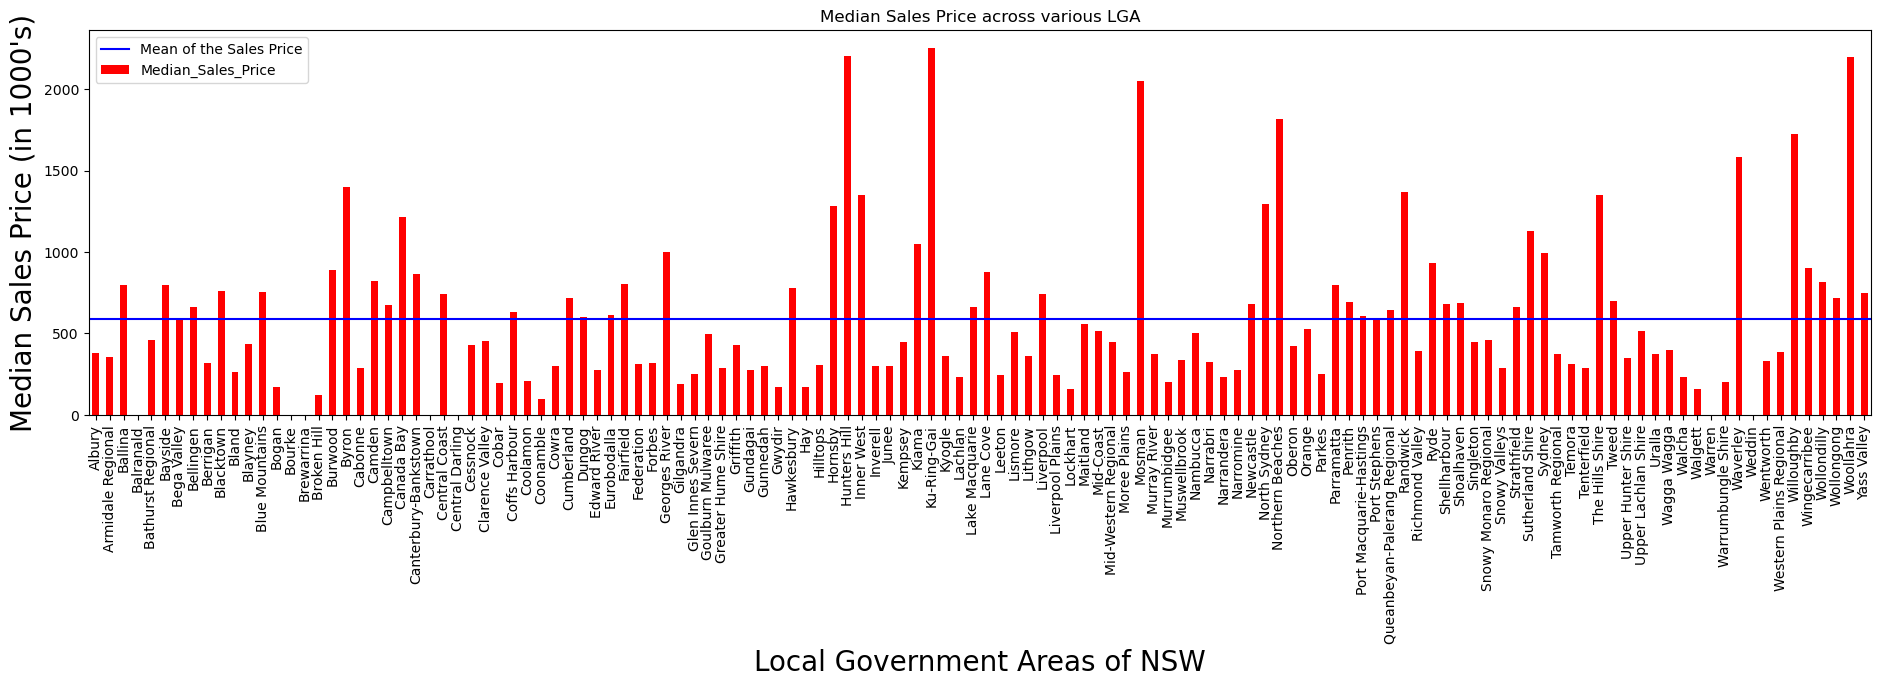

In [58]:
grpsales_price = groupsales.groupby('LGA')['Median_Sales_Price'].sum()
grpsales_price = grpsales_price.reset_index()
mean2 = grpsales_price['Median_Sales_Price'].mean()

grpsales_price.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Median_Sales_Price', facecolor='r')
plt.axhline(mean2, color='b', linestyle='-', label='Mean of the Sales Price')
plt.xlabel('Local Government Areas of NSW', size=20)
plt.ylabel("Median Sales Price (in 1000's)", size=20)
plt.title('Median Sales Price across various LGA')
plt.legend()
plt.show()

## Analysis of the graph:

Ku-Ring-Gai has the highest house prices at just above 2 Million australian dollars, This is followed by Hunter's Hill at about 2 Million australian dollars, Woolahara at about 2 million australian dollars and Mossman at just below 2 million dollars. The mean house price after considering all the areas is above 500,000 Australian dollars.

### Income Data

In [59]:
inc.head(5)

0              NaN                Earners  Median age of earners  \
1              LGA  LGA NAME    (persons)                  years   
0              NaN       NaN      Earners  Median age of earners   
1              LGA  LGA NAME    (persons)                  years   
2       Australia        NaN  1,40,69,082                     42   
3  New South Wales       NaN    44,66,941                     42   
4            10050    Albury       29,898                     43   

0                Sum  Median    Mean  P80/P20  P80/P50  P20/P50  P10/P50  \
1                  $       $       $    ratio    ratio    ratio    ratio   
0                Sum  Median    Mean  P80/P20  P80/P50  P20/P50  P10/P50   
1                  $       $       $    ratio    ratio    ratio    ratio   
2  9,03,88,86,74,402  49,805  64,246     5.02     1.88     0.37     0.16   
3  3,00,17,69,88,652  50,153  67,200     5.11     1.91     0.37     0.16   
4     1,68,65,39,002  47,732  56,410     4.59     1.75     0.38     0.16   

0  Gini coefficient  Top 1%  Top 5%  Top 10%  Lowest Quartile  \
1             coef.       %       %        %                %   
0  Gini coefficient  Top 1%  Top 5%  Top 10%  Lowest Quartile   
1             coef.       %       %        %                %   
2             0.483     9.6    22.6     33.6             25.0   
3             0.499    11.2    24.5     35.5             25.0   
4             0.442     7.7    19.4     29.7             25.1   

0  Second Quartile  Third Quartile  Highest Quartile  
1                %               %                 %  
0  Second Quartile  Third Quartile  Highest Quartile  
1                %               %                 %  
2             25.0            25.0              25.0  
3             24.7            24.4              26.0  
4             27.0            27.6              20.2

In [95]:
inc.columns = [inc.iloc[0], inc.iloc[1]]

inc1 = inc[2:]
inc1.head(5)

0              NaN                         Earners Median age of earners  \
1              LGA           LGA NAME    (persons)                 years   
2       Australia                 NaN  1,40,69,082                    42   
3  New South Wales                NaN    44,66,941                    42   
4            10050             Albury       29,898                    43   
5            10130  Armidale Regional       15,913                    44   
6            10250            Ballina       25,608                    48   

0                Sum  Median    Mean P80/P20 P80/P50 P20/P50 P10/P50  \
1                  $       $       $   ratio   ratio   ratio   ratio   
2  9,03,88,86,74,402  49,805  64,246    5.02    1.88    0.37    0.16   
3  3,00,17,69,88,652  50,153  67,200    5.11    1.91    0.37    0.16   
4     1,68,65,39,002  47,732  56,410    4.59    1.75    0.38    0.16   
5       82,86,31,202  42,220  52,073    5.56    1.91    0.34    0.13   
6     1,38,05,01,523  42,246  53,909    5.49    1.91    0.35    0.13   

0 Gini coefficient Top 1% Top 5% Top 10% Lowest Quartile Second Quartile  \
1            coef.      %      %       %               %               %   
2            0.483    9.6   22.6    33.6            25.0            25.0   
3            0.499   11.2   24.5    35.5            25.0            24.7   
4            0.442    7.7   19.4    29.7            25.1            27.0   
5            0.480    7.5   20.0    31.3            30.1            28.0   
6            0.488    8.8   22.1    33.2            29.6            28.6   

0 Third Quartile Highest Quartile  
1              %                %  
2           25.0             25.0  
3           24.4             26.0  
4           27.6             20.2  
5           23.2             18.7  
6           23.1             18.7

In [61]:
inc2 = inc1.copy()

inc2.columns = inc2.columns.droplevel(1)
inc2.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
2,Australia,NaN,"1,40,69,082",42,"9,03,88,86,74,402","49,805","64,246",5.02,1.88,0.37,0.16,0.483,9.6,22.6,33.6,25.0,25.0,25.0,25.0
3,New South Wales,NaN,"44,66,941",42,"3,00,17,69,88,652","50,153","67,200",5.11,1.91,0.37,0.16,0.499,11.2,24.5,35.5,25.0,24.7,24.4,26.0
4,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
5,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
6,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7


In [63]:
#Dropping the first 2 rows with sum totals

inc3 = inc2.iloc[2:]
inc3.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
4,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
5,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
6,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
7,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
8,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9


In [64]:
# index with 1
inc3.index = np.arange(1, len(inc3) + 1)
inc3.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9


In [65]:
data_frame = inc3.rename(columns={np.nan: 'LGA'})
data_frame

,LGA,LGA,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,np - not published to protect the confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data_frame.columns
data_frame.columns = ['LGA_Codes', 'LGA', 'Number_of_Earners', 'Median_age_of_earners', 'Income_Sum', 'Income_Median',
       'Income_Mean', 'P80/P20', 'P80/P50', 'P20/P50', 'P10/P50', 'Gini coefficient',
       'Top 1%', 'Top 5%', 'Top 10%', 'Lowest Quartile', 'Second Quartile',
       'Third Quartile', 'Highest Quartile']


In [97]:
data_frame

,LGA_Codes,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,np - not published to protect the confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# filtering LGAs under New South Wales - starting with 1

filter = data_frame['LGA_Codes'] < "20000"
inc3 = data_frame[filter]
inc3.head()

,LGA_Codes,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9


In [69]:
inc3 = inc3.drop(['LGA_Codes', 'P80/P20', 'P80/P50', 'P20/P50','P10/P50','Gini coefficient',
                       'Top 1%','Top 5%','Top 10%','Lowest Quartile','Second Quartile','Third Quartile',
                       'Highest Quartile'], axis = 1)


In [70]:
inc_graph = inc3.groupby('LGA')['Income_Median'].sum()
inc_graph = inc_graph.reset_index()
## replacing the , and converting to flaot
inc_graph["Income_Median"] = inc_graph["Income_Median"].str.replace(',', '').astype(float)
mean4 = inc_graph['Income_Median'].mean()

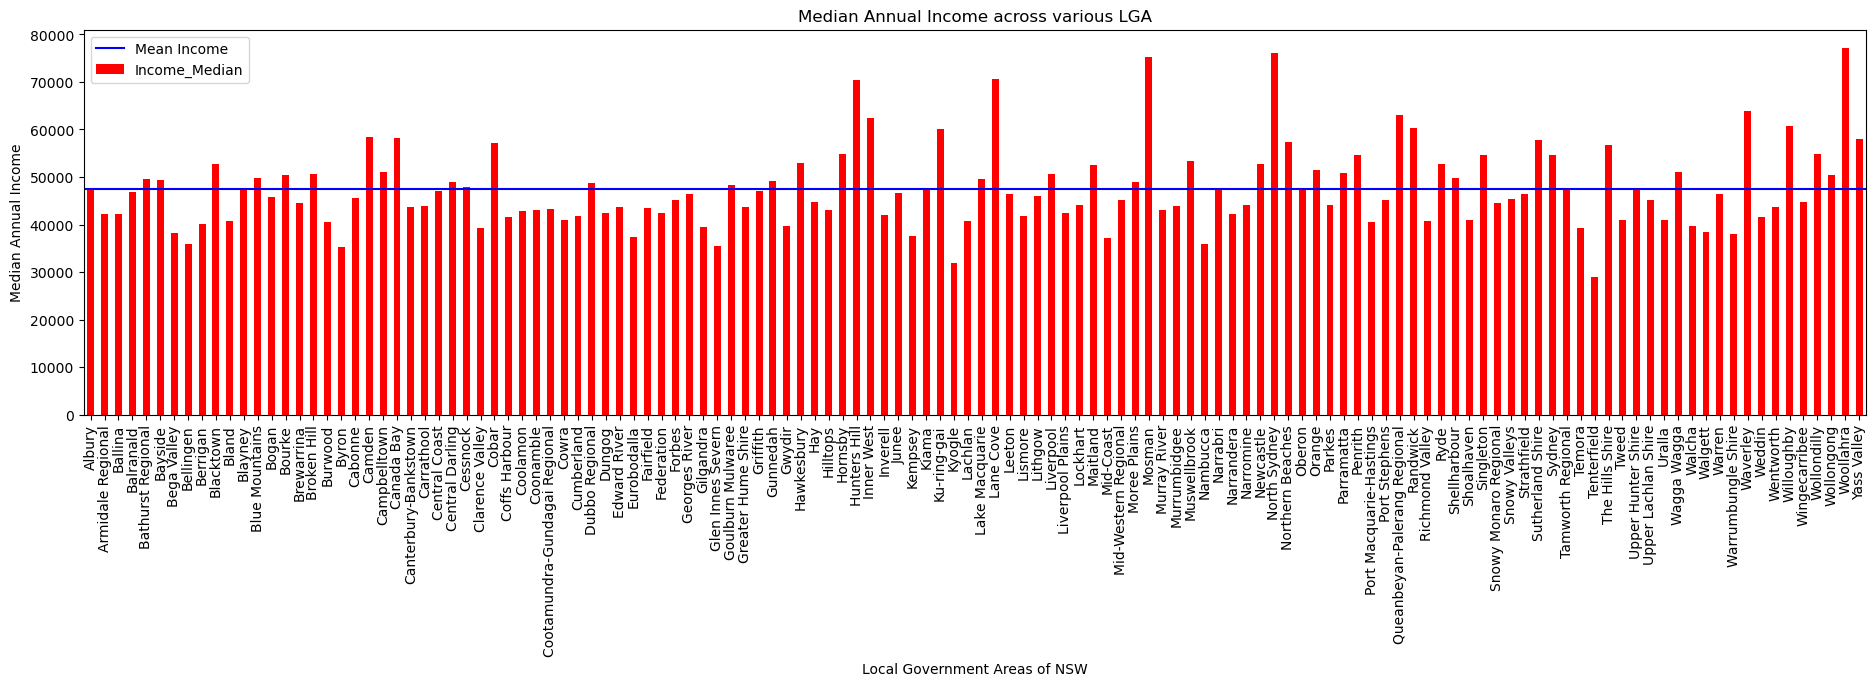

In [71]:
inc_graph.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Income_Median', facecolor='r')
plt.axhline(mean4, color='b', linestyle='-', label='Mean Income')
plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Median Annual Income', size=10)
plt.title('Median Annual Income across various LGA')
plt.legend()
plt.show()

## Analysis of the graph:  

The areas with the highest median incomes across all the above areas are:
- Yaas Valley at around 70,000 Australian dollars.
- North sydney at around 70,000 Australian dollars.
- Woolahara at around 70,000 Australian dollars.
The average median sallary across the above areas is just below 50,000 Australian Dollars.


## creating a Dataset for Linear Regression with sales and income:

In [72]:
dataframe_final = pd.merge(sales_d2, inc3, on='LGA', how='outer')
dataframe_final.drop(dataframe_final.tail(3).index, inplace = True)

In [73]:
dataframe_final

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean
0,Albury,Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410"
1,Albury,Non Strata,340.0,413.0,530.0,443.0,285.0,"29,898",43,"1,68,65,39,002","47,732","56,410"
2,Albury,Strata,178.0,221.0,299.0,251.0,76.0,"29,898",43,"1,68,65,39,002","47,732","56,410"
3,Armidale Regional,Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073"
4,Armidale Regional,Non Strata,310.0,372.0,459.0,408.0,154.0,"15,913",44,"82,86,31,202","42,220","52,073"
...,...,...,...,...,...,...,...,...,...,...,...,...
337,Woollahra,Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621"
338,Woollahra,Non Strata,2990.0,4287.0,5828.0,4594.0,107.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621"
339,Woollahra,Strata,1150.0,1640.0,2490.0,2067.0,199.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621"
340,Yass Valley,Total,526.0,750.0,996.0,775.0,72.0,"10,173",47,"71,10,89,586","58,097","69,900"


In [74]:
f7 = dataframe_final['DwellingType'] == "Total"
dataframe_final = dataframe_final[f7]
dataframe_final= dataframe_final.reset_index()
dataframe_final = dataframe_final.drop(['index'], axis=1)
dataframe_final

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean
0,Albury,Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410"
1,Armidale Regional,Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073"
2,Ballina,Total,635.0,795.0,1143.0,927.0,218.0,"25,608",48,"1,38,05,01,523","42,246","53,909"
3,Balranald,Total,0.0,0.0,0.0,0.0,0.0,"1,239",45,"6,93,45,495","46,868","55,969"
4,Bathurst Regional,Total,371.0,460.0,550.0,472.0,262.0,"22,346",44,"1,30,18,20,483","49,633","58,257"
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Wingecarribee,Total,702.0,900.0,1280.0,1035.0,386.0,"29,511",49,"1,87,06,11,314","44,735","63,387"
124,Wollondilly,Total,661.0,813.0,1129.0,900.0,202.0,"29,666",43,"1,93,09,27,957","54,811","65,089"
125,Wollongong,Total,577.0,720.0,922.0,793.0,900.0,"1,13,903",43,"7,13,85,41,170","50,484","62,672"
126,Woollahra,Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621"


In [75]:
dataframe_final.columns

Index(['LGA', 'DwellingType', 'First_Quartile_Sales_Price',
       'Median_Sales_Price', 'Third_Quartile_Sales_Price', 'Mean_Sales_Price',
       'Number_of_Sales', 'Number_of_Earners', 'Median_age_of_earners',
       'Income_Sum', 'Income_Median', 'Income_Mean'],
      dtype='object')

## Predicting the number of sales through Linear Regression Analysis.

Creating a dataset through linear regression, in order to estimate the total number of sales by focusing on inputs like Number of earners, Median Income and Median sales price.


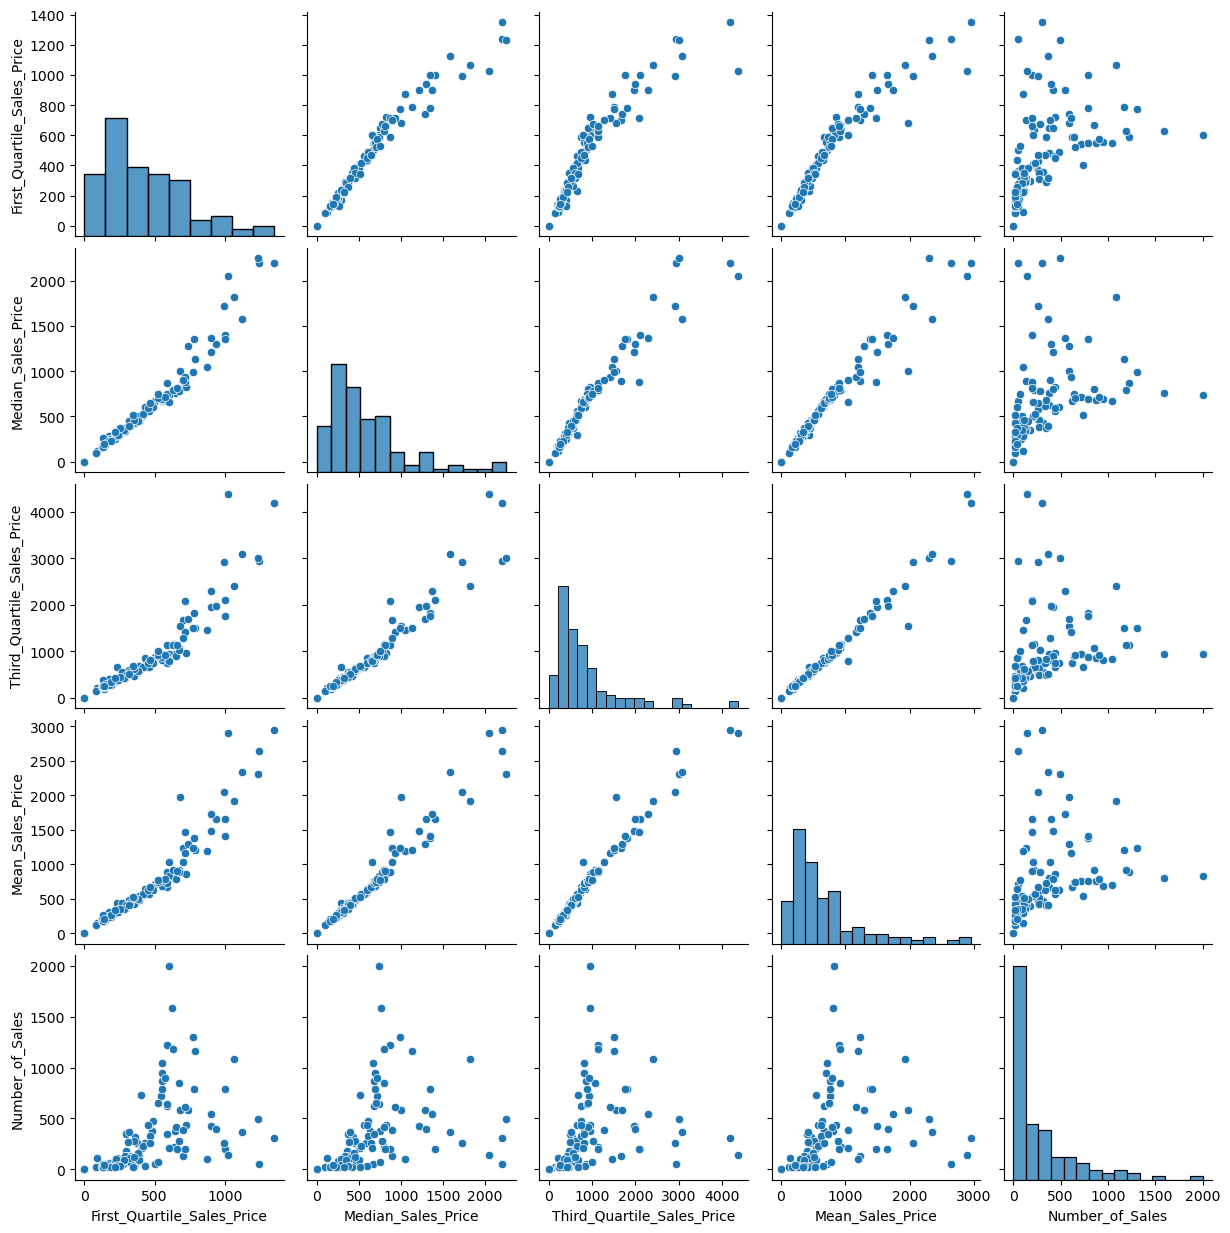

In [76]:
sns.pairplot(dataframe_final)
plt.show()

The pairplot provides a detailed relationship among all features present in dataframe_final.

In [77]:
lrm = dataframe_final[['Number_of_Sales','Income_Median','Number_of_Earners', 'Median_Sales_Price']]

In [78]:
lrm.head(10)

,Number_of_Sales,Income_Median,Number_of_Earners,Median_Sales_Price
0,361.0,"47,732","29,898",380.0
1,179.0,"42,220","15,913",355.0
2,218.0,"42,246","25,608",795.0
3,0.0,"46,868","1,239",0.0
4,262.0,"49,633","22,346",460.0
5,853.0,"49,445","1,01,523",800.0
6,260.0,"38,318","19,742",580.0
7,54.0,"35,924","6,953",665.0
8,63.0,"40,157","4,584",320.0
9,1589.0,"52,802","1,95,437",760.0


In [79]:
lrm.isna().sum()

Number_of_Sales       0
Income_Median         3
Number_of_Earners     3
Median_Sales_Price    0
dtype: int64

In [80]:
lrm = lrm.fillna(method='bfill')

In [81]:
lrm = lrm.replace('[^\d.]','', regex=True).astype(float)

In [82]:
scaler = preprocessing.StandardScaler()
std_df = scaler.fit_transform(lrm)
std_df = pd.DataFrame(std_df) 
std_df

,0,1,2,3
0,0.195044,0.059188,-0.093069,-0.445984
1,-0.307416,-0.587810,-0.401292,-0.499989
2,-0.199746,-0.584758,-0.187619,0.450507
3,-0.801593,-0.042228,-0.724701,-1.266867
4,-0.078272,0.282327,-0.259512,-0.273166
...,...,...,...,...
123,0.264063,-0.292600,-0.101598,0.677330
124,-0.243918,0.890120,-0.098182,0.489391
125,1.683097,0.382217,1.758365,0.288490
126,0.043202,3.513325,0.124550,3.474813


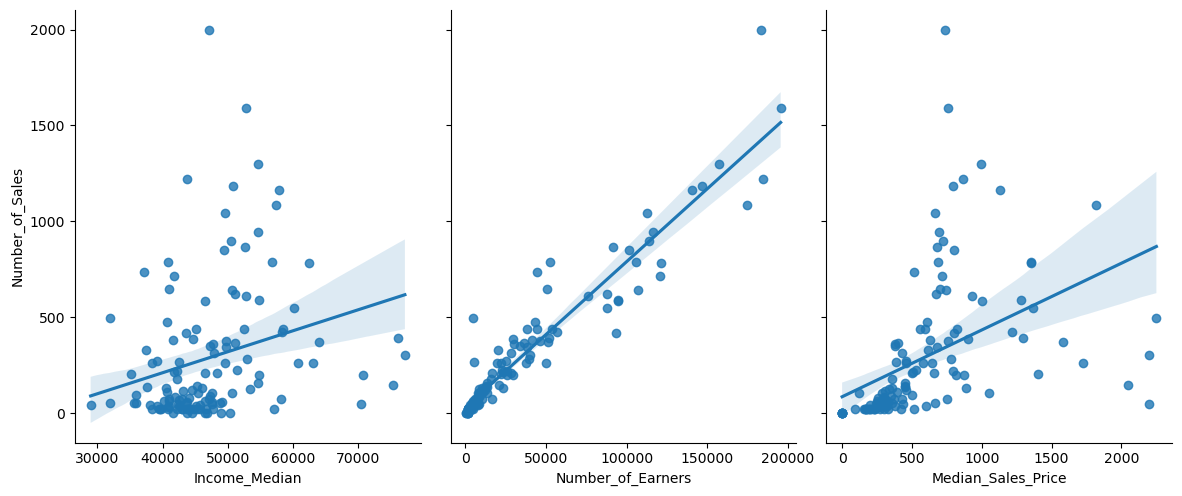

In [83]:
sns.pairplot(lrm, x_vars=["Income_Median","Number_of_Earners","Median_Sales_Price"], y_vars=["Number_of_Sales"],
             height=5, aspect=.8, kind="reg");

### The pairplots show a positve correlation between number of sales and:
- Income Median
- Number of earners
- Median Sales Price

In [84]:
corr1 = lrm[["Number_of_Sales","Income_Median","Number_of_Earners","Median_Sales_Price"]]
corr1.corr()

,Number_of_Sales,Income_Median,Number_of_Earners,Median_Sales_Price
Number_of_Sales,1.000000,0.257436,0.951598,0.444834
Income_Median,0.257436,1.000000,0.339643,0.569614
Number_of_Earners,0.951598,0.339643,1.000000,0.475512
Median_Sales_Price,0.444834,0.569614,0.475512,1.000000


The correlation table provides the correlation between the above mentioned columns that are a part of the dataframe.
We can observe that the number of sales has a positive correlation with each of the above columns. This means that as the value of any column increases, the value of number of sales also increases.
The correlation of each column mentioned in the above table with respect to Number of sales is:
- Income Median: Indicates a low positive correlation of 0.257.
- Number of Earners: Indicates a very high positive correlation of 0.951.
- Median Sales price: Indicates a mild positive correlation of 0.445.

In [85]:
train, test = train_test_split(std_df, test_size=0.3, random_state=42)
print(train.shape)
print(test.shape)

(89, 4)
(39, 4)


In [86]:
X_train = train[[1,2,3]]
y_train = train[0]
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.1200419   0.96568994  0.05357681] + 0.0073816088056202385


In [87]:
predicted_train = reg.predict(X_train)
print("MSE Train score:", mean_squared_error(y_train, predicted_train))
print("R Squared Train score:", r2_score(y_train, predicted_train))

MSE Train score: 0.09848913037844066
R Squared Train score: 0.9046058337138546


In [88]:
X_test = test[[1,2,3]]
y_test = test[0]
predicted_test = reg.predict(X_test)
print("MSE Test score:", mean_squared_error(y_test, predicted_test))
print("R Squared Test score:", r2_score(y_test, predicted_test))

MSE Test score: 0.0682262051339761
R Squared Test score: 0.9262690029247241


The $R^2$ value is 0.926 on our test data which means 92.6% of the varaition in our independant variable Number of Sales is explained by our 3 predictor variables.


###  Using RFE for better understanding

In [89]:
#to increment number of features, one at a time
r2_scores = []
for i in range(1,4):
    lm = linear_model.LinearRegression()
    cod = RFE(estimator=lm, n_features_to_select=i)
    # training model
    
    cod.fit(X_train, y_train)
    # predicting on test set
    
    y_pred = cod.predict(X_test)
    r2_score1 = r2_score(y_test, y_pred)
    # print this
    
    print("R2 using", i, "features: ", r2_score1)
    # append to the list
    
    r2_scores.append(r2_score1)

R2 using 1 features:  0.9336809759321473
R2 using 2 features:  0.9269750941538961
R2 using 3 features:  0.9262690029247241


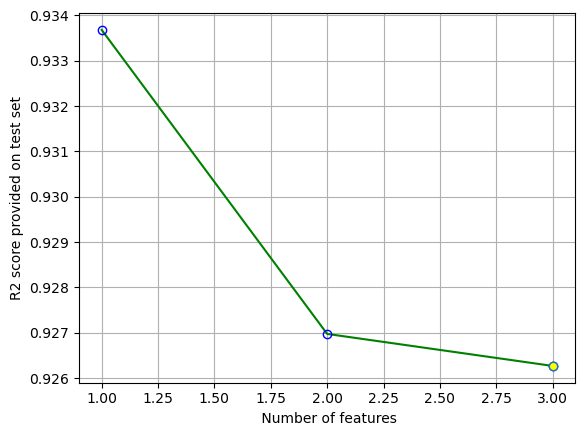

In [90]:
#Estimating accuracy score on test set using RFE by using different number of features


r2_scores = []
for i in range(1, 4):
    lm2 = linear_model.LinearRegression()
    sl = RFE(estimator=lm2,n_features_to_select= i)
    sl = sl.fit(X_train, y_train)
    supp = sl.get_support()

    predicted = sl.predict(X_test)
    r2_scoree = r2_score(y_test, predicted)
    r2_scores.append(r2_scoree)
  
best = 1
for item in r2_scores:
    if item < r2_scores[best - 1]:
        best = r2_scores.index(item) + 1

plt.grid()   
plt.xlabel(' Number of features')
plt.ylabel('R2 score provided on test set')
plt.plot(range(1, 4), r2_scores, marker = 'o', color = 'green', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None')
plt.plot(best, r2_scores[best-1], marker = 'o', markerfacecolor = 'yellow')

In the above graph we can see that as the number of features increases, the value of R^2 decreases Significantly. The maximum R^2 is at around 0.934 with number of features at 1.00 .
At the maximum number of features i.e 3.00, The r^2 falls to just around 0.926.



In [92]:
lr_model = linear_model.LinearRegression()
sl2 = RFE(estimator = lr_model, n_features_to_select=1, step=1)
sl2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [93]:
ytest_rfe = sl2.predict(X_test)
print("R2 score with RFE: ", r2_score(y_test, ytest_rfe))

R2 score with RFE:  0.9336809759321473


With a R^2 score of 0.933, it indicates that the data fits correctly to the model.

In [94]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, sl2.support_[i], sl2.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 3.000


The above data indicates that the best column that can be used to predict the number of sales is the income earners.
this is followed by income median and median sales price.


## K-Means Clustering

Clustering various LGAs which are similar in terms of their Rent cost, Sales cost etc.

The following headings will be considered while performing the KMeans clustering:

- Median_Weekly_Rent
- Median_Sales_Price
- Number_of_Sales
- Income_Median


In [675]:
f8= rental['Dwelling Types'] == "Total"
f9= rental['Number of Bedrooms'] == "Total"
af2= f8&f9
rental2= rental[af2]
rental2 = rental2.reset_index()
rental2 = rental2.drop(['index'], axis=1)
km_df = pd.merge(rental2, dataframe_final, on='LGA', how='outer')
km_df

,LGA,Dwelling Types,Number of Bedrooms,First_Quartile_Weekly_Rent,Median_Weekly_Rent,Third Quartile_Weekly_Rent,New_Bonds_Lodged,Total_Bonds,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean
0,Albury,Total,Total,270,338.0,400,538,"6,350",Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410"
1,Armidale Regional,Total,Total,260,320.0,390,374,"3,410",Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073"
2,Ballina,Total,Total,450,580.0,680,305,"3,861",Total,635.0,795.0,1143.0,927.0,218.0,"25,608",48,"1,38,05,01,523","42,246","53,909"
3,Balranald,Total,Total,0,0.0,0,0,109,Total,0.0,0.0,0.0,0.0,0.0,"1,239",45,"6,93,45,495","46,868","55,969"
4,Bathurst Regional,Total,Total,320,375.0,440,361,"4,228",Total,371.0,460.0,550.0,472.0,262.0,"22,346",44,"1,30,18,20,483","49,633","58,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Wingecarribee,Total,Total,443,545.0,650,282,"3,077",Total,702.0,900.0,1280.0,1035.0,386.0,"29,511",49,"1,87,06,11,314","44,735","63,387"
124,Wollondilly,Total,Total,383,450.0,550,178,"2,370",Total,661.0,813.0,1129.0,900.0,202.0,"29,666",43,"1,93,09,27,957","54,811","65,089"
125,Wollongong,Total,Total,380,480.0,575,"1,716","19,409",Total,577.0,720.0,922.0,793.0,900.0,"1,13,903",43,"7,13,85,41,170","50,484","62,672"
126,Woollahra,Total,Total,500,700.0,1050,869,"8,957",Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621"


In [676]:
km_df.isna().sum()

LGA                           0
Dwelling Types                0
Number of Bedrooms            0
First_Quartile_Weekly_Rent    0
Median_Weekly_Rent            0
Third Quartile_Weekly_Rent    0
New_Bonds_Lodged              0
Total_Bonds                   0
DwellingType                  0
First_Quartile_Sales_Price    0
Median_Sales_Price            0
Third_Quartile_Sales_Price    0
Mean_Sales_Price              0
Number_of_Sales               0
Number_of_Earners             3
Median_age_of_earners         3
Income_Sum                    3
Income_Median                 3
Income_Mean                   3
dtype: int64

In [677]:
km_df = km_df.fillna(method='bfill')

In [678]:
km_df = km_df.drop(columns = ["Dwelling Types", "Number of Bedrooms", "DwellingType", "First_Quartile_Weekly_Rent",
                               "Third Quartile_Weekly_Rent","First_Quartile_Sales_Price", "Third_Quartile_Sales_Price",
                               "Mean_Sales_Price", "Income_Sum", "Income_Mean", "Number_of_Earners", "New_Bonds_Lodged",
                                "Median_age_of_earners", "Total_Bonds"])
km_df.head(10)

,LGA,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median
0,Albury,338.0,380.0,361.0,"47,732"
1,Armidale Regional,320.0,355.0,179.0,"42,220"
2,Ballina,580.0,795.0,218.0,"42,246"
3,Balranald,0.0,0.0,0.0,"46,868"
4,Bathurst Regional,375.0,460.0,262.0,"49,633"
5,Bayside,520.0,800.0,853.0,"49,445"
6,Bega Valley,400.0,580.0,260.0,"38,318"
7,Bellingen,430.0,665.0,54.0,"35,924"
8,Berrigan,270.0,320.0,63.0,"40,157"
9,Blacktown,440.0,760.0,1589.0,"52,802"


In [680]:
km_df = km_df.set_index('LGA')

In [681]:
km_df = km_df.replace('[^\d.]','', regex=True).astype(float)

In [682]:
km_df

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median
LGA,,,,
Albury,338.0,380.0,361.0,47732.0
Armidale Regional,320.0,355.0,179.0,42220.0
Ballina,580.0,795.0,218.0,42246.0
Balranald,0.0,0.0,0.0,46868.0
Bathurst Regional,375.0,460.0,262.0,49633.0
...,...,...,...,...
Wingecarribee,545.0,900.0,386.0,44735.0
Wollondilly,450.0,813.0,202.0,54811.0
Wollongong,480.0,720.0,900.0,50484.0


In [683]:
dist = pdist(km_df, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

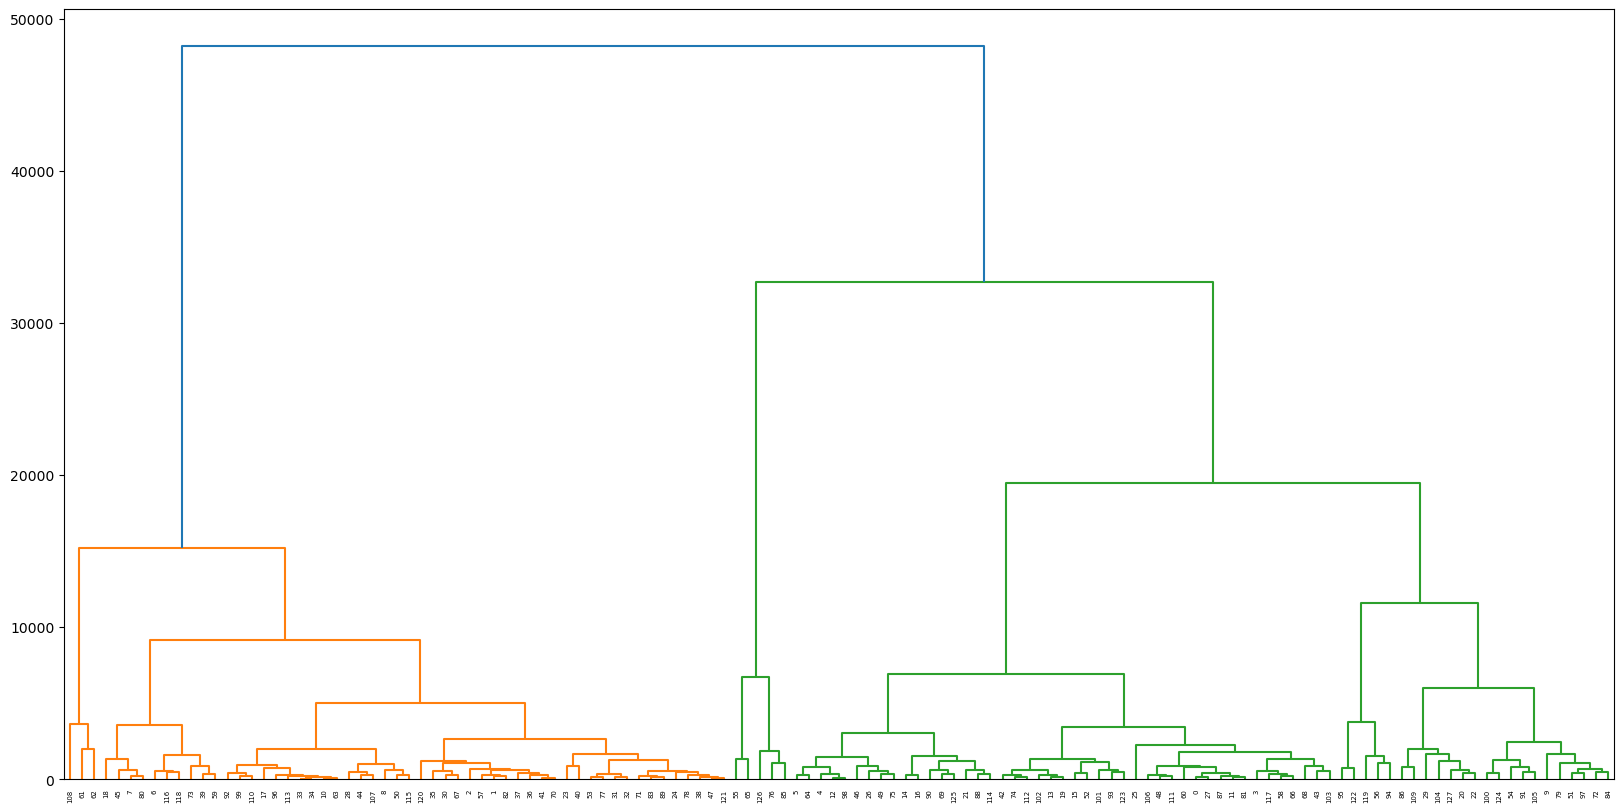

In [684]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

The above plot indicates that 3 clusters are requried to conduct the analysis.
Further we will group the data into clusters to perform the k-Means cluster analysis.

In [444]:
km = KMeans(n_clusters = 3)
km.fit(kmeans_df)

KMeans(n_clusters=3)

In [685]:
km_df["label"] = km.predict(km_df)

In [686]:
km_df[km_df["label"] == 0]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,label
LGA,,,,,
Albury,338.0,380.0,361.0,47732.0,0
Balranald,0.0,0.0,0.0,46868.0,0
Bathurst Regional,375.0,460.0,262.0,49633.0,0
Bayside,520.0,800.0,853.0,49445.0,0
Blacktown,440.0,760.0,1589.0,52802.0,0
Blayney,350.0,433.0,49.0,47530.0,0
Blue Mountains,470.0,755.0,379.0,49788.0,0
Bourke,240.0,0.0,0.0,50405.0,0
Broken Hill,250.0,120.0,107.0,50628.0,0


In [687]:
km_df[km_df["label"] == 1]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,label
LGA,,,,,
Hunters Hill,595.0,2200.0,49.0,70458.0,1
Inner West,490.0,1350.0,785.0,62468.0,1
Lane Cove,530.0,875.0,199.0,70686.0,1
Mosman,600.0,2050.0,145.0,75311.0,1
North Sydney,560.0,1295.0,394.0,76063.0,1
Queanbeyan-Palerang Regional,450.0,645.0,263.0,63094.0,1
Randwick,550.0,1370.0,547.0,60208.0,1
Waverley,695.0,1580.0,371.0,63934.0,1
Willoughby,558.0,1725.0,263.0,60792.0,1


In [688]:
km_df[km_df["label"] == 2]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,label
LGA,,,,,
Armidale Regional,320.0,355.0,179.0,42220.0,2
Ballina,580.0,795.0,218.0,42246.0,2
Bega Valley,400.0,580.0,260.0,38318.0,2
Bellingen,430.0,665.0,54.0,35924.0,2
Berrigan,270.0,320.0,63.0,40157.0,2
...,...,...,...,...,...
Walgett,240.0,161.0,20.0,38447.0,2
Warrumbungle Shire,230.0,200.0,43.0,38009.0,2
Weddin,0.0,0.0,0.0,41625.0,2


#### We find the mean value for each column by making clusters.

In [689]:
km_df_mean = km_df.groupby(["label"]).agg('mean')
km_df_mean.head()

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median
label,,,,
0,400.653846,605.057692,438.288462,50861.519231
1,572.800000,1528.500000,332.200000,68017.300000
2,331.939394,429.060606,167.454545,41214.863636


- We can see now that Cluster 2 have relatively low weekly rent, sales price, and income as compared to the other two clusters.
- Cluster 1 has the highest income as compared to the other two clusters whereas Cluster 0 lies somewhere between the other two with respect to the attributes. We can see that Cluster 0 has the highest crime rate. 

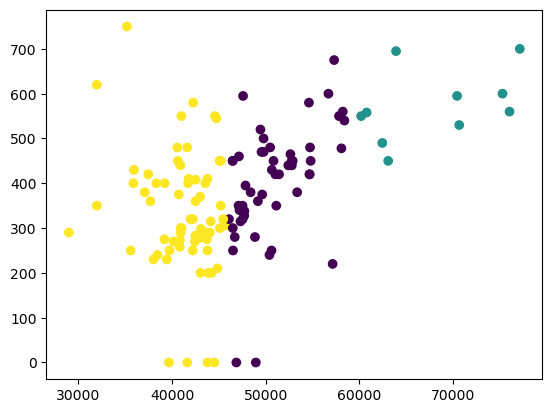

In [690]:
plt.scatter(km_df['Income_Median'], km_df['Median_Weekly_Rent'], c = km_df['label'])
plt.show()

The graph indicates a positive correlation between income median and the median weekly rent.
As we discussed earler, the graph is correctly divided into 3 clusters(yellow, purple and green).

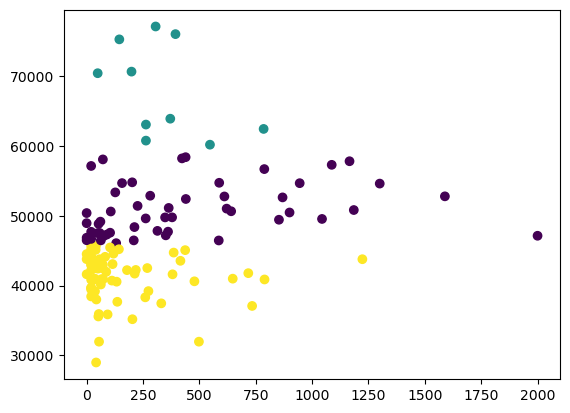

In [691]:
plt.scatter(km_df['Number_of_Sales'], km_df['Income_Median'], c = km_df['label'])
plt.show()

The above dataset is divided into 3 clusters. Although there is a slight positive correlation between the columns but is not a significant correlation. 

We successfully implemented a Linear Regression model to forecast the number of sales in any Local Government Area (LGA) in New South Wales based on Median income and total number of crimes, in line with our project goals. Our findings indicate a strong positive correlation between the number of earners and the number of sales, as households with higher earnings are able to invest in properties, leading to an increase in the number of house sales.

Although I got a few poor correlations between certain columns but the data provides a clear understanding about the problems and the solutions for those problems.

During the linear regression model, we have divided the train test into 30-70 ratio. Upon further evaluation we find out that the data fits correctly to our model while calculating R^2 and MSE.

Furthermore, Upon using the KMeans clustering method, we were able to divide the dataset into 3 major clusters.
The above graphs have clearly depicted the various clusters and the values of each clusters for various columns.

By looking at the clusters, we can divide them into various groups of people who belong to different earning slabs like lower middle class, middle class or upper middle class and upper class.

We can also conclude that as the observations increases the accuracy and goodness of the model starts Deteriorating. By adding a few columns we can reach at a better conclusion. Various other columns like the crime data and family sizes can also create a huge impact in the analysis.

To conclude, The dataset answers all the problems highlighted above through various forms of regression analysis.